In [1]:
import tflite_runtime.interpreter as tflite
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from picamera import PiCamera
from picamera.array import PiRGBArray
import serial
from time import sleep
import pandas as pd
import tensorflow as tf

# Device Drivers/Communication

In [35]:
def capture_and_collect(camera, i):
    camera.start_preview()
    with PiRGBArray(camera, size=(640,720)) as frame:
        label = input('Enter Label to capture (empty input skips action): ')
        if len(label) > 0:
            camera.capture(frame, 'rgb')
            plt.imshow(frame.array)
            cv.imwrite(f'images/img{i}.jpg', frame.array)
            with open('images/headings.txt', 'a+') as fn:
                fn.write(f'{label},')
            i += 1
    camera.stop_preview()
    return i

In [36]:
num = 160

Enter Label to capture (empty input skips action): 0


PermissionError: [Errno 13] Permission denied: 'images/headings.txt'

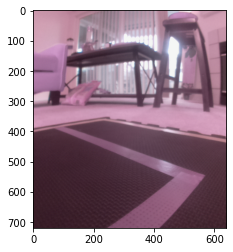

In [44]:
num = capture_and_collect(camera,num)

In [38]:
#camera = PiCamera(resolution=(640,720))
# cut is a span[-90...90] sliced into 5 bins
# heading will be classified as it closest bin
def capture_and_transfer(camera, frame, arduino, cut):
    camera.capture(frame, 'rgb')
    input_data = np.array([frame.array], dtype=np.float32)
    interpreter.set_tensor(0, input_data)
    interpreter.invoke()
    heading = interpreter.get_tensor(37)
    print('Heading: ', heading)
    heading_id = int(np.digitize(x=heading, bins=cut))
    print(heading_id)
    arduino.write(bytearray([1, heading_id]))
        

In [49]:
interpreter = tf.lite.Interpreter(model_path="Nav-Model-1.tflite")
interpreter.allocate_tensors()
#camera = PiCamera(resolution=(640,720))
arduino = serial.Serial('/dev/ttyUSB1', 9600)
enable = 1
disable_msg = bytearray([0,0,0,0])
frame = PiRGBArray(camera, size=(640,720))
cut = [-54, -18, 18, 54]


try:
    for i in range(4):
        camera.start_preview()
        capture_and_transfer(camera, frame, arduino, cut)
        frame.truncate(0)
        sleep(1)
        arduino.write(disable_msg)
    while arduino.in_waiting:
        line = arduino.readline()
        print(line)
except KeyboardInterrupt:
    arduino.write(disable_msg)
    camera.stop_preview()
    print('Thanks for Driving!')

Heading:  [[45.236115]]
3
Heading:  [[24.802366]]
3
Heading:  [[104.96743]]
4
Heading:  [[57.800385]]
4
b'Drive_state: 1\r\n'
b'heading: 3\r\n'
b'Enabled: 1\r\n'
b'Drive_state: 0\r\n'
b'heading: 0\r\n'
b'Enabled: 0\r\n'
b'Drive_state: 0\r\n'
b'heading: 0\r\n'
b'Enabled: 0\r\n'
b'Drive_state: 1\r\n'
b'heading: 3\r\n'
b'Enabled: 1\r\n'
b'Drive_state: 0\r\n'
b'heading: 0\r\n'
b'Enabled: 0\r\n'
b'Drive_state: 0\r\n'
b'heading: 0\r\n'
b'Enabled: 0\r\n'
b'Drive_state: 2\r\n'
b'heading: 4\r\n'
b'Enabled: 1\r\n'
b'Drive_state: 0\r\n'
b'heading: 0\r\n'
b'Enabled: 0\r\n'
b'Drive_state: 0\r\n'
b'heading: 0\r\n'
b'Enabled: 0\r\n'
b'Drive_state: 2\r\n'
b'heading: 4\r\n'
b'Enabled: 1\r\n'
b'Drive_state: 0\r\n'
b'heading: 0\r\n'
b'Enabled: 0\r\n'
b'Drive_state: 0\r\n'
b'heading: 0\r\n'


VVVVV--- For developing the heading -> velocity table ---VVVVV

In [54]:
arduino = serial.Serial('/dev/ttyUSB1', 9600)
enable = 1
disable_msg = bytearray([0,0,0,0])

try:
    for i in range(100):
        mesg = input('Test Command: ').split(',')
        if len(mesg) == 2:
            msg = bytearray([enable,2])
            arduino.write(msg)
            sleep(1)
            arduino.write(disable_msg)
              
except KeyboardInterrupt:
    print('Thanks for Driving!')

Test Command: 1,1
Thanks for Driving!


[24,27,28,29,30,31,32,37,38,39,40,41,42,62,63,64,65,66,67,90,91,92,93,97,97,114,115,116,117,118,119,120,131,132,133,134,135,139,140,141,142]

# Deep Learning CV

In [10]:
def load_data(path):    
    images = []

    for i in range(160):
        print(path + str(i) + '.jpg')
        images.append(cv.cvtColor(cv.imread(path + str(i) + '.jpg'),cv.COLOR_BGR2RGB))
        

    # initialze image data (input)
    images = np.array(images)
    #plt.imshow(images[7])

    # initialize normalized headings (output)
    with open('images/headings.txt', 'r') as f:
        headings = np.array(f.read().strip('\n').split(','))
        
    #le = OneHotEncoder()
    #encoded_headings = le.fit_transform(headings.reshape(len(headings), 1)).toarray()
    print(headings[:5])
    #print(encoded_headings[:5])
    
    return (images, headings.astype(np.float))

images/img0.jpg
images/img1.jpg
images/img2.jpg
images/img3.jpg
images/img4.jpg
images/img5.jpg
images/img6.jpg
images/img7.jpg
images/img8.jpg
images/img9.jpg
images/img10.jpg
images/img11.jpg
images/img12.jpg
images/img13.jpg
images/img14.jpg
images/img15.jpg
images/img16.jpg
images/img17.jpg
images/img18.jpg
images/img19.jpg
images/img20.jpg
images/img21.jpg
images/img22.jpg
images/img23.jpg
images/img24.jpg
images/img25.jpg
images/img26.jpg
images/img27.jpg
images/img28.jpg
images/img29.jpg
images/img30.jpg
images/img31.jpg
images/img32.jpg
images/img33.jpg
images/img34.jpg
images/img35.jpg
images/img36.jpg
images/img37.jpg
images/img38.jpg
images/img39.jpg
images/img40.jpg
images/img41.jpg
images/img42.jpg
images/img43.jpg
images/img44.jpg
images/img45.jpg
images/img46.jpg
images/img47.jpg
images/img48.jpg
images/img49.jpg
images/img50.jpg
images/img51.jpg
images/img52.jpg
images/img53.jpg
images/img54.jpg
images/img55.jpg
images/img56.jpg
images/img57.jpg
images/img58.jpg
images/

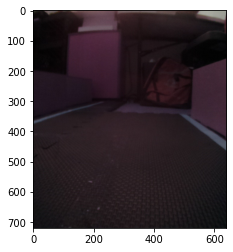

In [11]:
images, headings = load_data('images/img')

print(images.shape, headings.shape)
plt.imshow(images[-1])

In [12]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="Nav-Model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
print(input_shape, images.shape)
input_data = np.array([images[33]], dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

print('predicted: ',output_data)
print('actual: ', output_details[0]['index'])

[  1 720 640   3] (160, 720, 640, 3)
predicted:  [[-2.2754958]]
actual:  37


In [6]:
interpreter = tflite.Interpreter(model_path='test-model.tflite')

NameError: name 'tflite' is not defined

In [ ]:
model = tf.keras.models.load_model('lin_reg-2.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
